In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingClassifier


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
train = pd.read_csv("/content/drive/MyDrive/hackathon dataset/Train Dataset .csv")
test = pd.read_csv("/content/drive/MyDrive/hackathon dataset/Test Dataset.csv")
sample_sub = pd.read_csv("/content/drive/MyDrive/hackathon dataset/Sample Submission.csv")

In [3]:
train.columns = train.columns.str.lower()
test.columns =test.columns.str.lower()




In [4]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [8]:
train.isnull().sum()

,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [9]:
test.isnull().sum()

,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


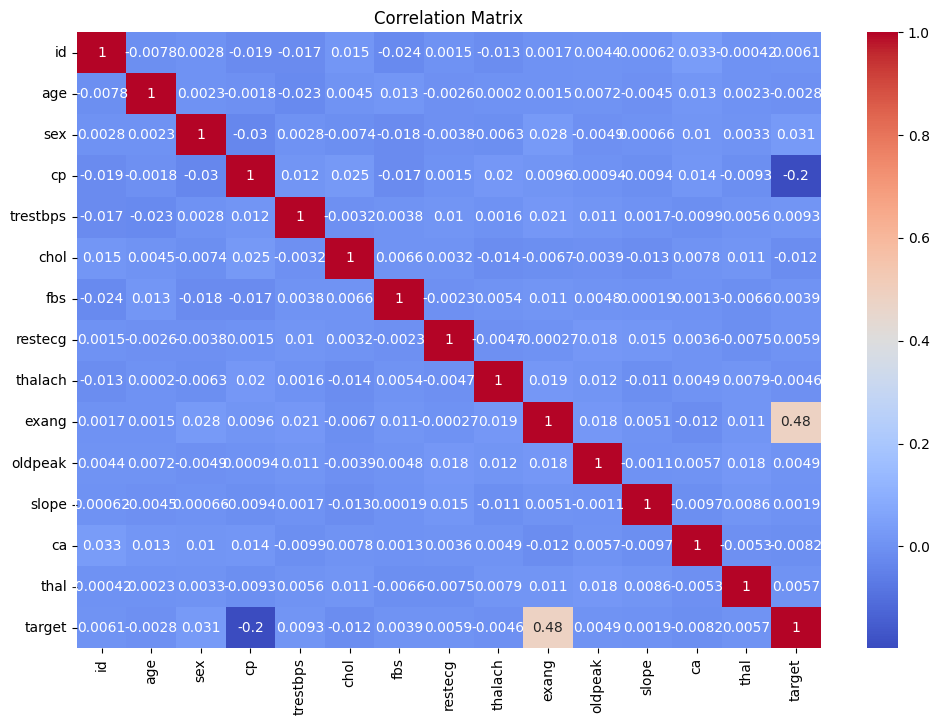

In [12]:
correlation = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

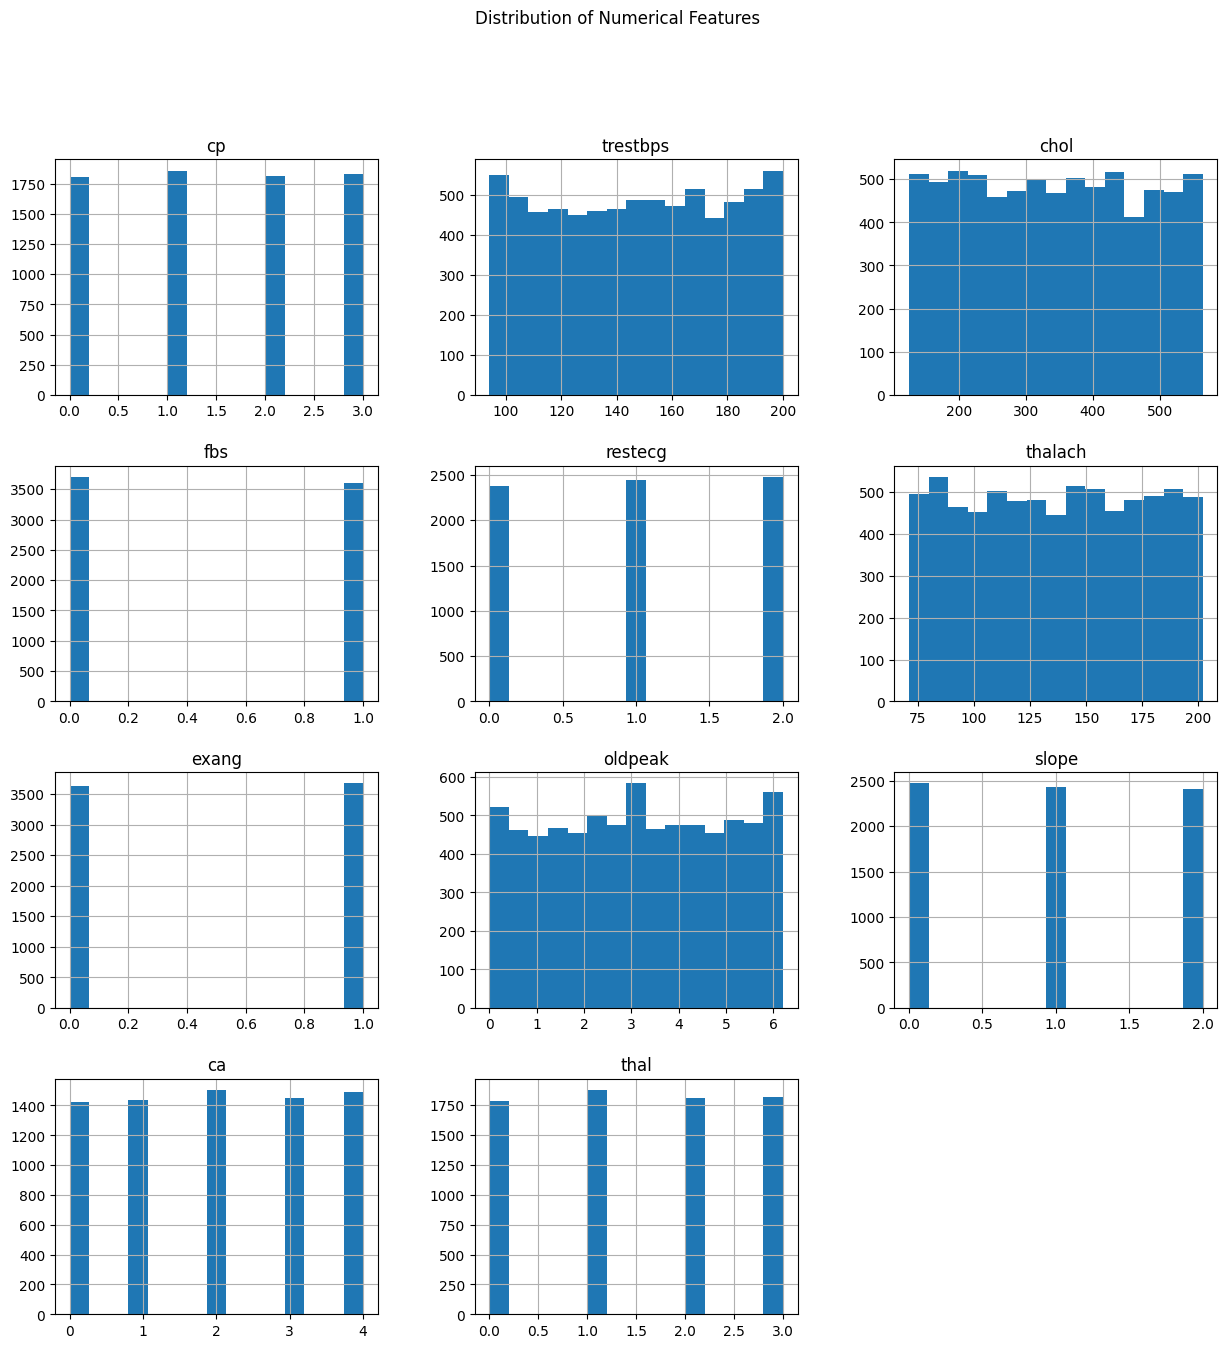

In [13]:
# Plot histograms for numerical features
numerical_features = ['cp',	'trestbps',	'chol',	'fbs'	, 'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca'	, 'thal']
train[numerical_features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()


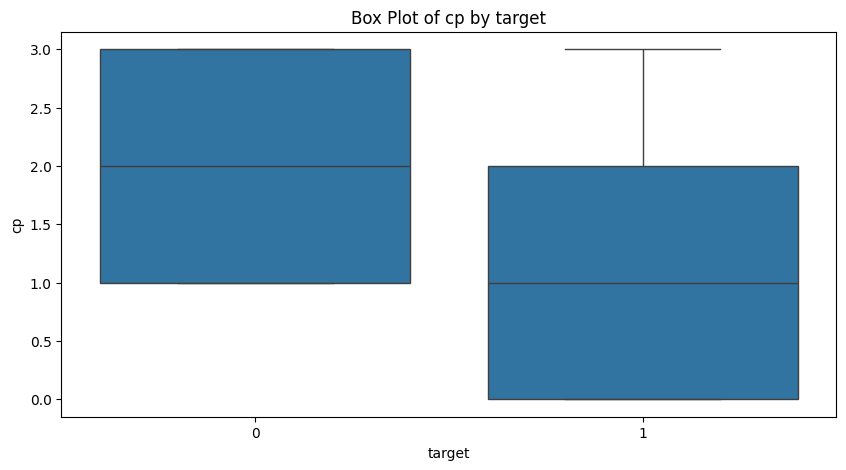

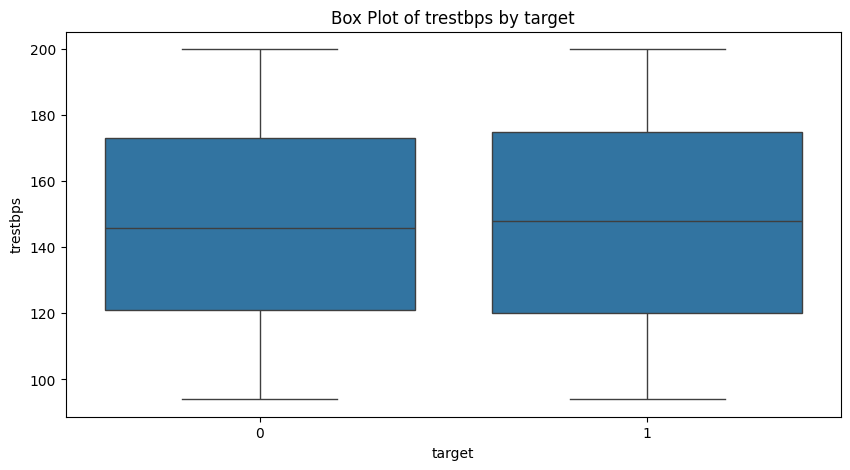

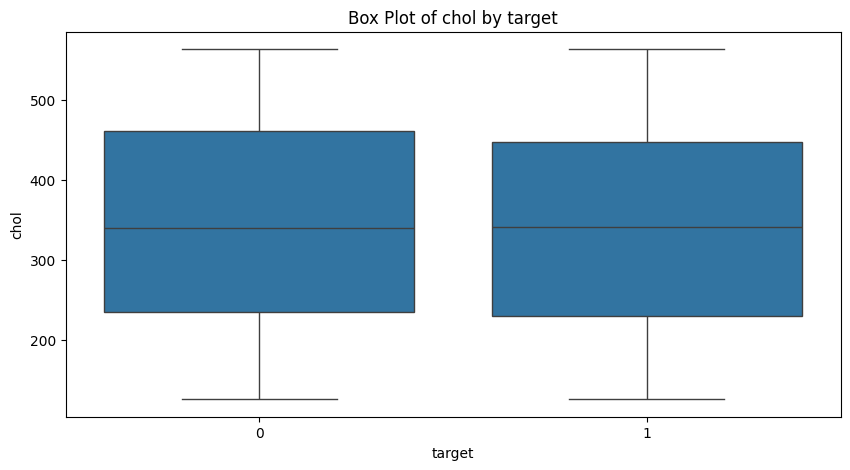

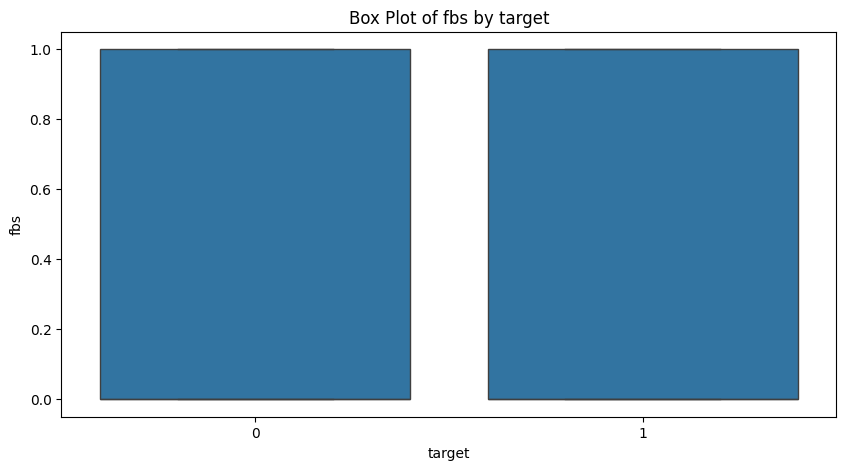

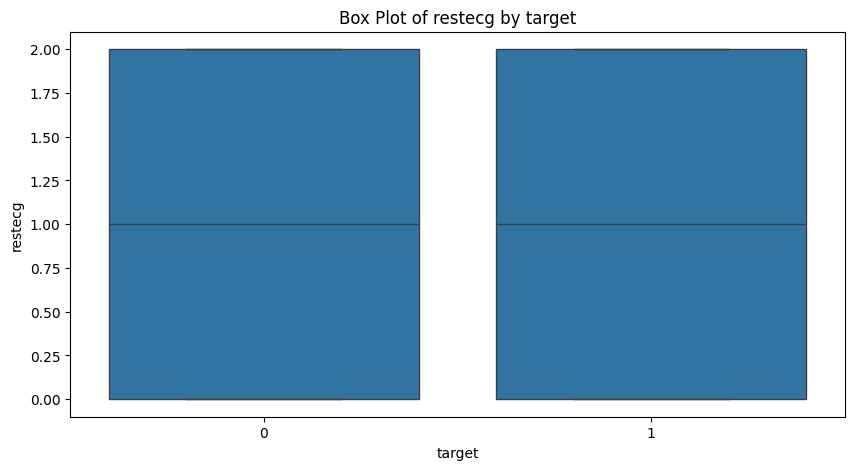

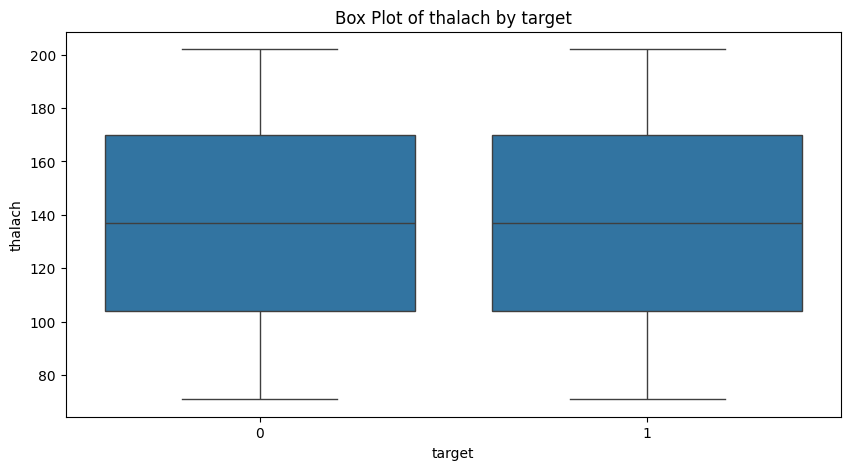

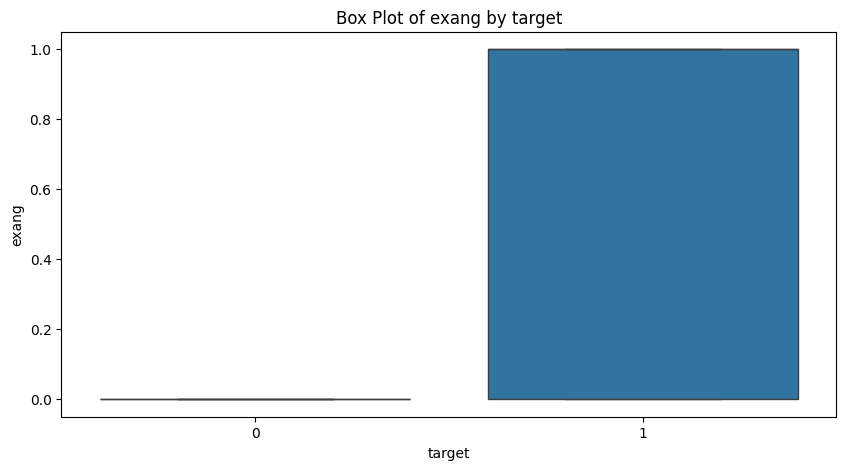

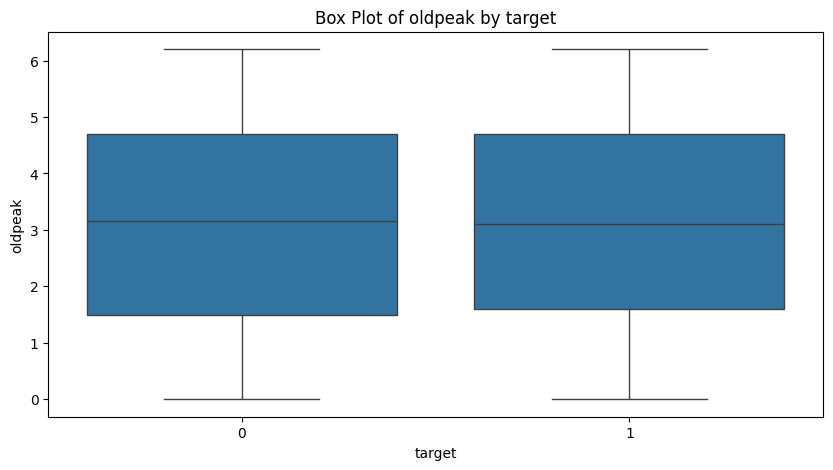

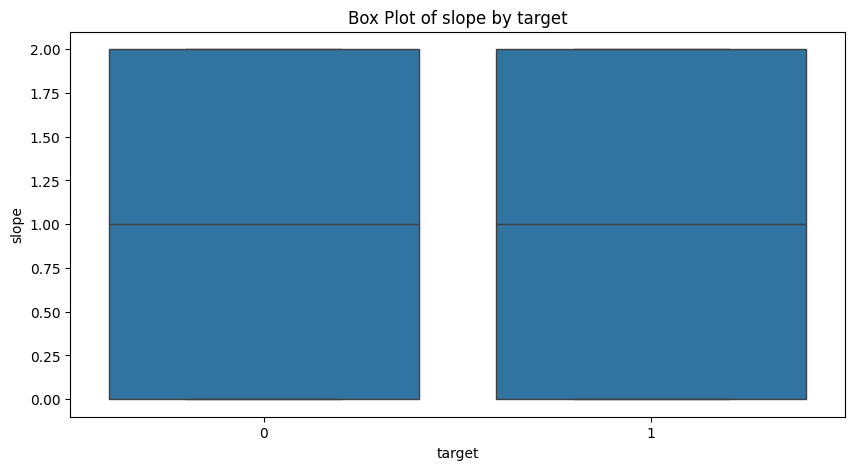

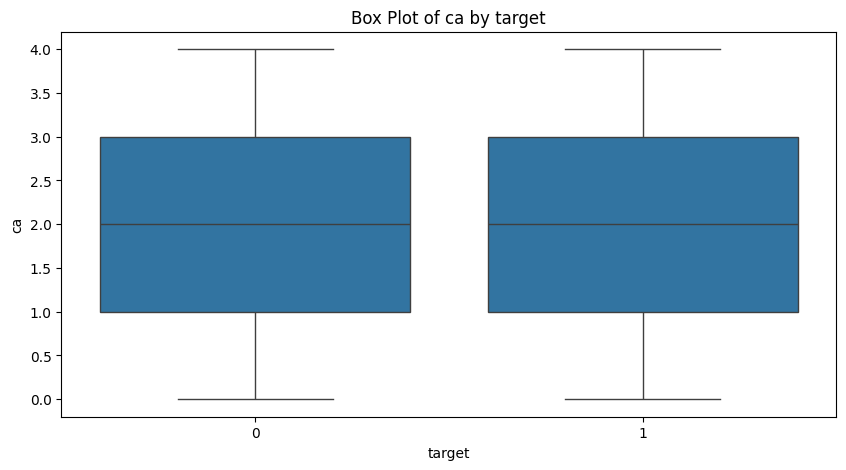

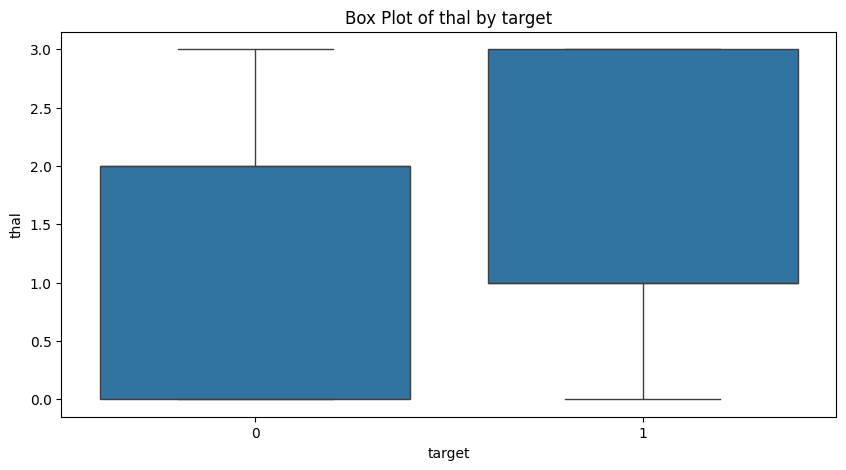

In [14]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=col, data=train)
    plt.title(f'Box Plot of {col} by target')
    plt.show()


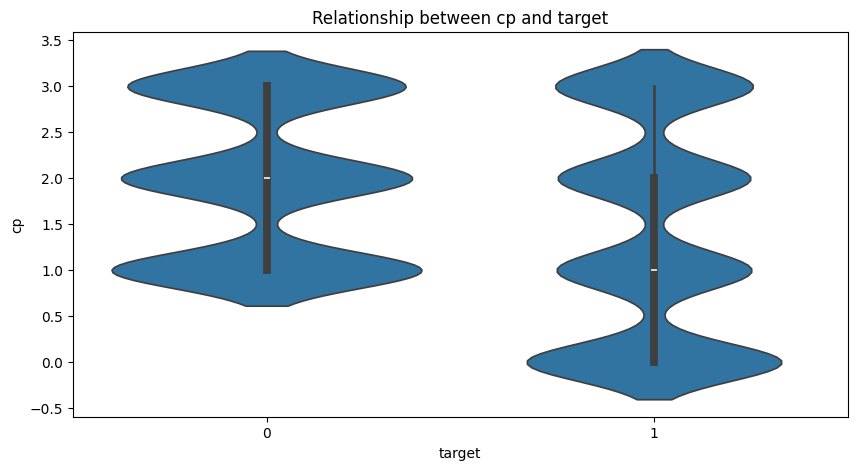

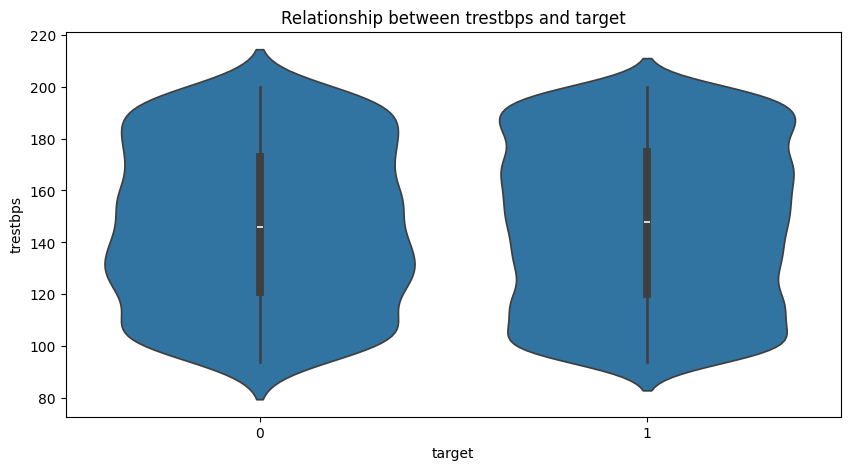

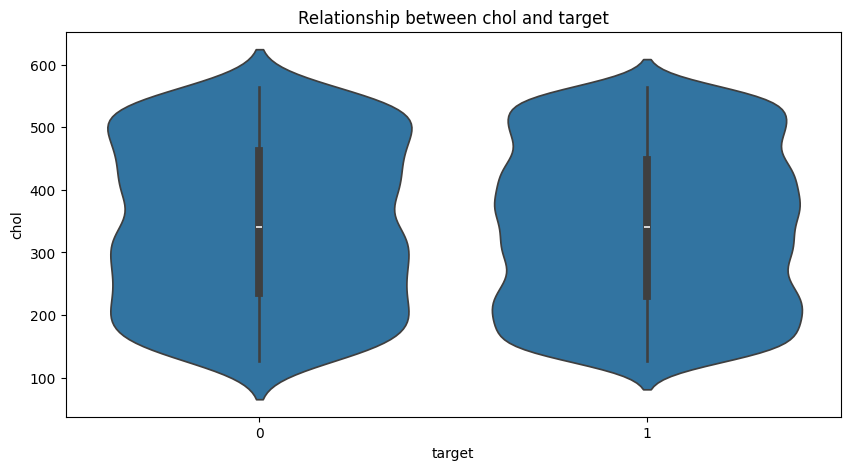

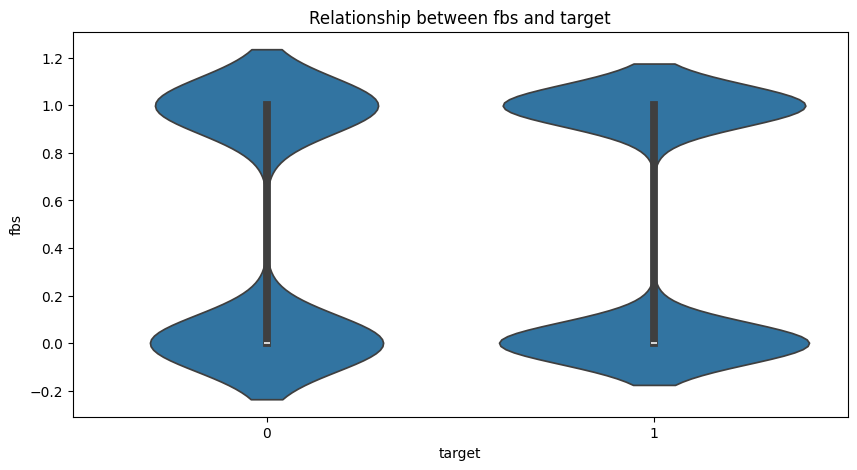

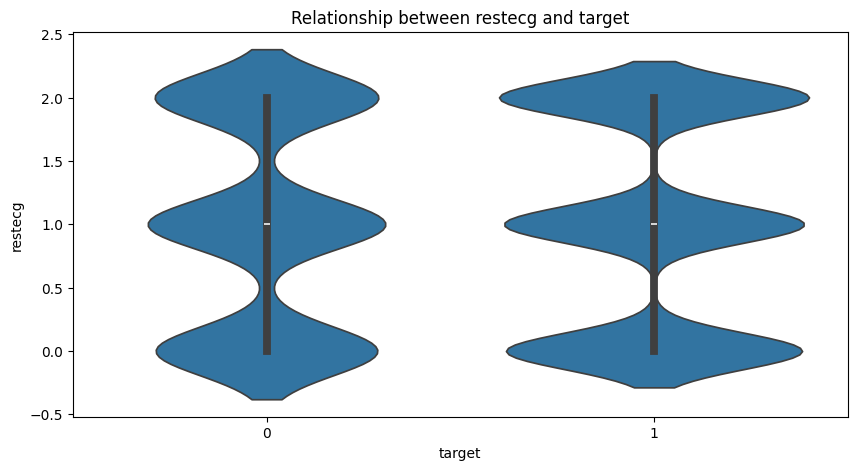

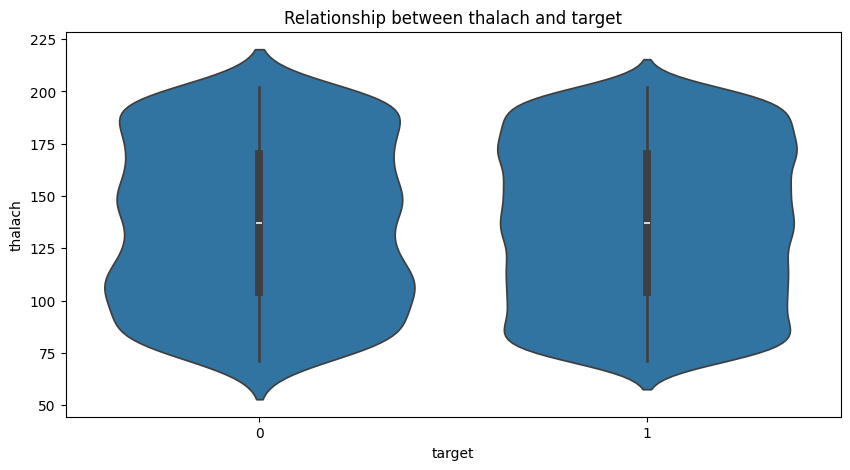

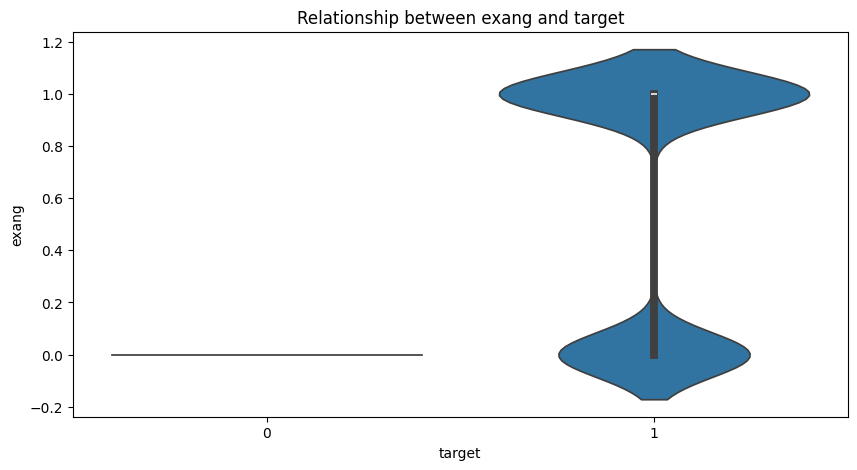

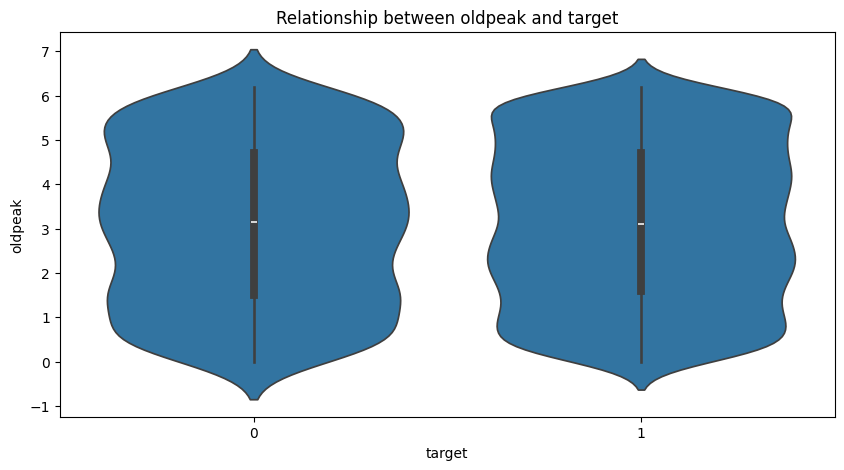

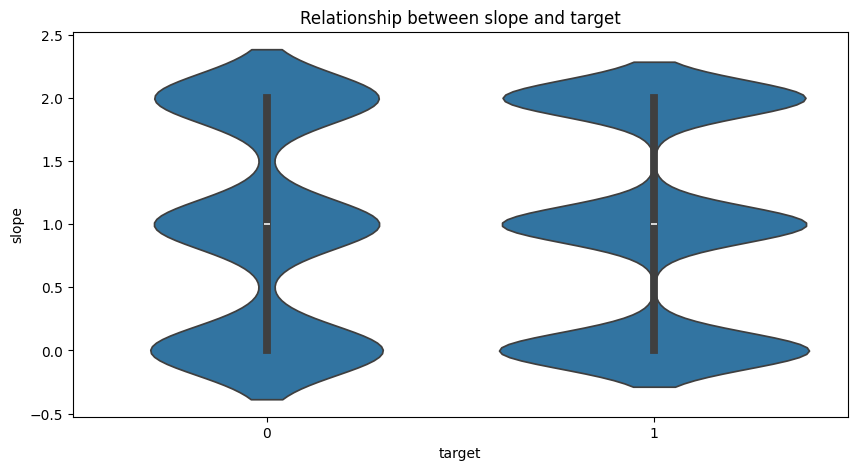

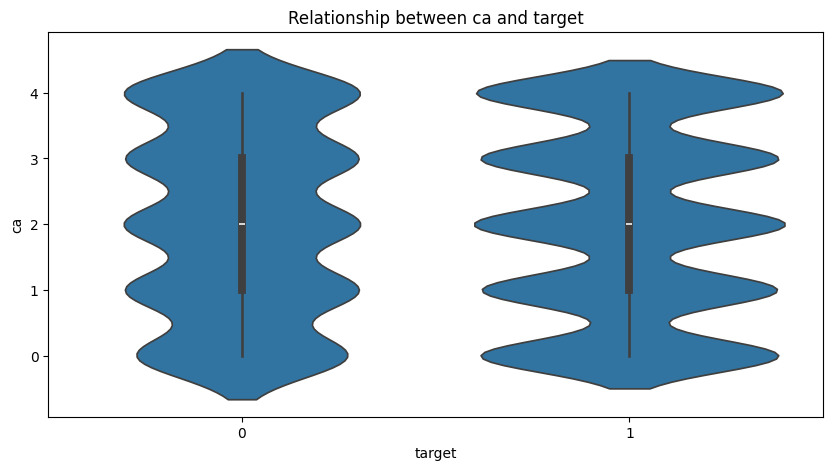

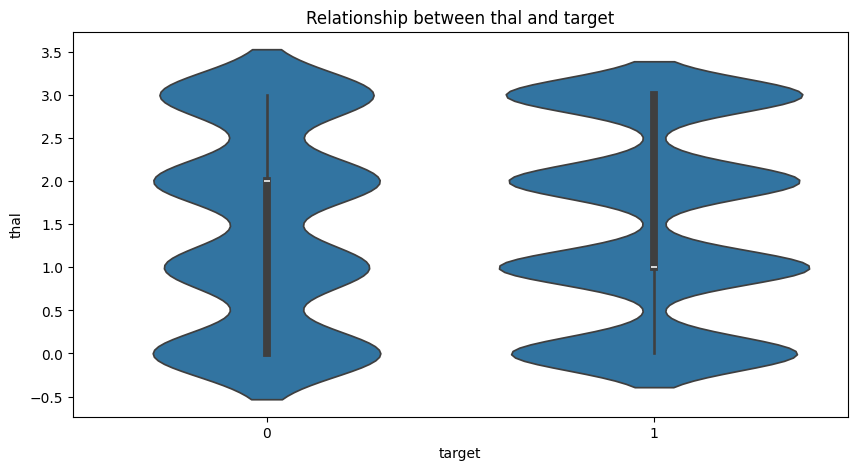

In [15]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='target', y=col, data=train)
    plt.title(f'Relationship between {col} and target')
    plt.show()


In [16]:
# Calculate the correlation of features with the target variable 'target'
correlation_with_target = train.corr()['target'].sort_values(ascending=False)
correlation_with_target


,target
target,1.000000
exang,0.481897
sex,0.030608
trestbps,0.009320
id,0.006148
restecg,0.005911
thal,0.005709
oldpeak,0.004899
fbs,0.003925
slope,0.001909


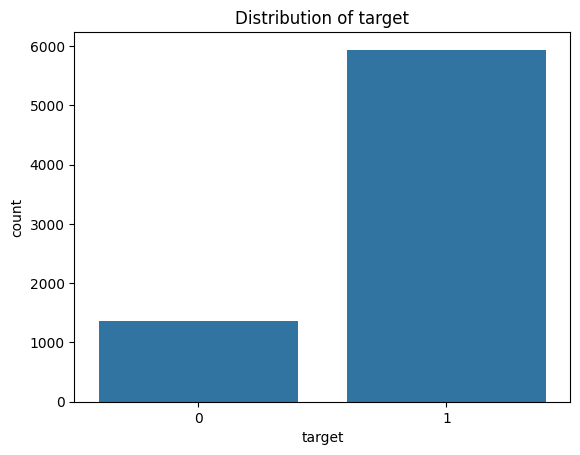

In [17]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='target', data=train)
plt.title('Distribution of target')
plt.show()

In [18]:
# Descriptive statistics of the training data
train.describe()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
# Separate features and target
X = train.drop(columns=['id', 'target'])
y = train['target']

In [20]:
# Step 1: Recursive Feature Elimination (RFE) using Random Forest
rf_for_rfe = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_for_rfe, n_features_to_select=10)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Reduce the dataset to the selected features
X_selected = X[selected_features]
X_test_selected = test[selected_features]

In [21]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [22]:
# Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Base models with hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}

# Random Forest Grid Search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=kf, n_jobs=-1)
rf_grid.fit(X_scaled, y)
best_rf = rf_grid.best_estimator_

# XGBoost Grid Search
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_params, cv=kf, n_jobs=-1)
xgb_grid.fit(X_scaled, y)
best_xgb = xgb_grid.best_estimator_

# LightGBM Grid Search
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_params, cv=kf, n_jobs=-1)
lgb_grid.fit(X_scaled, y)
best_lgb = lgb_grid.best_estimator_



[LightGBM] [Info] Number of positive: 5941, number of negative: 1362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 7303, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.813501 -> initscore=1.472923
[LightGBM] [Info] Start training from score 1.472923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [23]:
# Step 2: Stacking Classifier
# The meta-model (Logistic Regression) will combine predictions from base models
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    final_estimator=LogisticRegression(),
    cv=kf
)

# Cross-validation on Stacking Classifier
cv_preds = cross_val_predict(stacking_clf, X_scaled, y, cv=kf)
accuracy = accuracy_score(y, cv_preds)
print(f'Cross-validated accuracy: {accuracy}')

# Train final model on full training set
stacking_clf.fit(X_scaled, y)

# Predict on test data
test_preds = stacking_clf.predict(X_test_scaled)

# Prepare submission
submission_df = pd.DataFrame({
    'Id': test['id'],
    'target': test_preds
})

# Save the submission file
submission_df.to_csv('heart_disease_prediction_submission3.csv', index=False)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4753, number of negative: 1089
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 10
[Lig